In [1]:
## Mount the google drive to read the data file 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import matplotlib.pyplot as plt

In [3]:
#Set your project path 

import os
project_path =  '/content/drive/My Drive/Colab Notebooks/caps/'

In [4]:
os.chdir(project_path)

In [5]:
pwd

'/content/drive/My Drive/Colab Notebooks/caps'

In [6]:
ls

input_data.xlsx              ticketCategorization2-001.h5
ticketCategorization-003.h5  ticketCategorization2-005.h5
ticketCategorization-004.h5  ticketCategorization2-007.h5
ticketCategorization-006.h5  ticketCategorization2-009.h5
ticketCategorization-010.h5  ticketCategorization2-011.h5
ticketCategorization-012.h5  ticketCategorization2-012.h5
ticketCategorization-013.h5  ticketCategorization2-013.h5
ticketCategorization-016.h5  ticketCategorization2-020.h5
ticketCategorization-017.h5  ticketCategorizationC2-001.h5
ticketCategorization-019.h5  ticketCategorizationC2-002.h5
ticketCategorization-023.h5  ticketCategorizationC2-003.h5
ticketCategorization-025.h5  ticketCategorizationC2-004.h5
ticketCategorization-027.h5  ticketCategorizationC2-005.h5
ticketCategorization-029.h5  ticketCategorizationC2-007.h5
ticketCategorization-030.h5


In [7]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas import read_excel

### Read the input file containing the ticket records to be building the models
df =  read_excel('./input_data.xlsx', 'Sheet1')
df.head(10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [8]:
## Check the shape of the data records in the file

In [9]:
df.shape

(8500, 4)

In [10]:
## Check the contents in the file

In [11]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [12]:
### Describe the read dataframe
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [13]:
## Check the data types
df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [14]:
## let us count the tickets by group
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_73       1
GRP_67       1
GRP_64       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

There are 74 categories of tickets to be classifed

In [15]:
## dataframe input
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


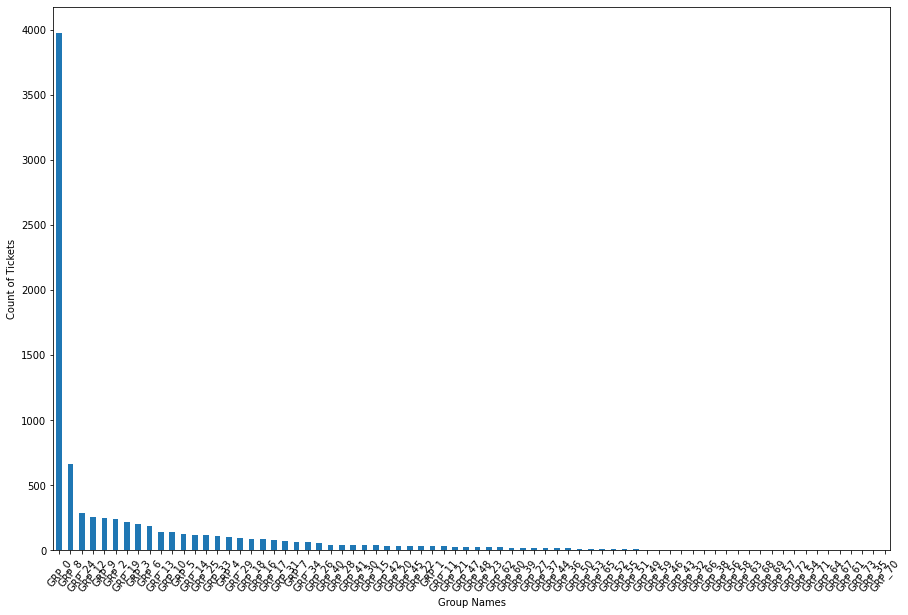

In [16]:
# Visualize the classfication groups
group_df = df.groupby("Assignment group")

plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

In [17]:
## Create the copy incase of future need
df_copy = df.copy()


**PRE-PROCESSING STEPS**
- Replacing Nan Values with Blank text string
- Grouping The Groups with less than 50 Tickets to seperate group
- Removing Duplicate Rows
- Group Description, Short Description and Caller to one group
- Text pre-processing on new text field

In [18]:
#Before Removing Nan
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


There are missing values for short description and description fields

In [19]:
df[df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [20]:
import numpy as np
# Replace all Nan entries with empty string
df = df.replace(np.nan, '', regex=True)

In [21]:
#After Removing Nan
df.describe().transpose()

,count,unique,top,freq
Short description,8500,7482,password reset,38
Description,8500,7818,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


Now all fields have equal number of records i.e. 8500

In [22]:
#Combining Groups with less tickets
## Count the number of groups with lesser tickets (samples)

TICKETCOUNT = 50

df[df.groupby('Assignment group')['Assignment group'].transform('size') < TICKETCOUNT].describe()


,Short description,Description,Caller,Assignment group
count,764,764,764,764
unique,746,755,471,50
top,msd crm,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_40
freq,4,3,33,45


There are around 764 groups with ticket samples less than TICKETCOUNT (50). Lets remove them..

In [23]:
df = df[df.groupby('Assignment group')['Assignment group'].transform('size') > TICKETCOUNT]

In [24]:
## Check the new shape and group count

df.shape

(7736, 4)

In [25]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
Name: Assignment group, dtype: int64

In [26]:
df.describe()

,Short description,Description,Caller,Assignment group
count,7736,7736,7736,7736
unique,6770,7070,2791,24
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,777,3976


Count the number of groups with updated dataset

In [27]:
groupCount = df['Assignment group'].nunique()
groupCount

24

Nowe we have number of ticket groups reduced from 74 to 24

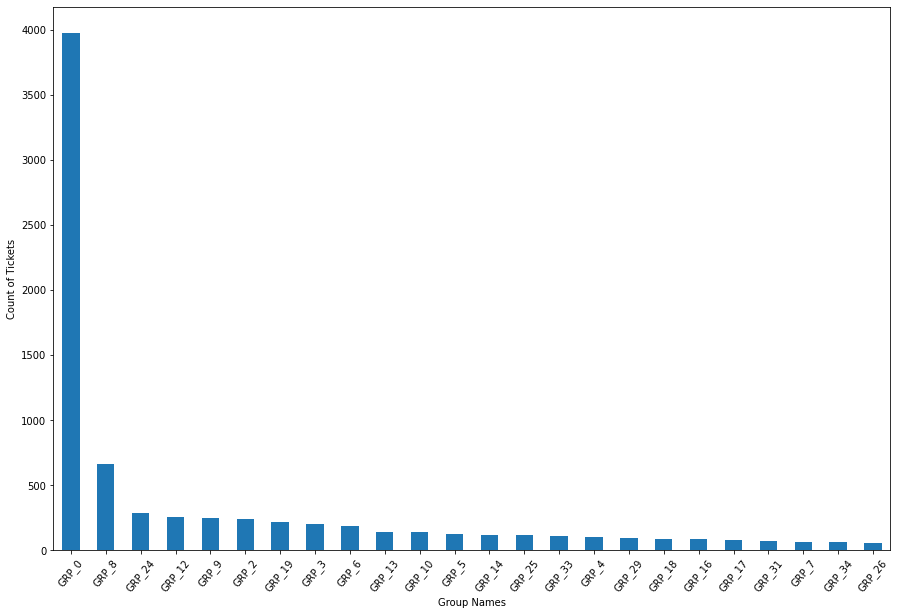

In [28]:
# Visualize the classfication groups with less groups now
group_df = df.groupby("Assignment group")

plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

Looks cool !!!

In [29]:
#Remove Duplicate Rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF.head()
df.drop_duplicates(keep=False,inplace=True)

In [30]:
df.describe()

,Short description,Description,Caller,Assignment group
count,7606,7606,7606,7606
unique,6731,7038,2785,24
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,34,744,3908


In [31]:
#Combine Text Fields
df['Final Description'] = df['Short description'].str.cat(df['Description'],sep=" ")
df['Final Description'] = df['Final Description'].str.cat(df['Caller'],sep=" ")

In [32]:
df['Final Description'].head()

0    login issue -verified user details.(employee# ...
1    outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2    cant log in to vpn \r\n\r\nreceived from: eylq...
3    unable to access hr_tool page unable to access...
4          skype error  skype error  owlgqjme qhcozdfx
Name: Final Description, dtype: object

In [33]:
## Decontract the words
import re
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text



In [34]:
df['Final Description'] = df['Final Description'].apply(lambda x: decontract(x))
df.head()

,Short description,Description,Caller,Assignment group,Final Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn \r\n\r\nreceived from: e...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx


In [35]:
## cleanup mail headers content 

def getMailIdRegexList():
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['Received:(.*)\r\n']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['Subject:']
    regexList += ['[\r\n]']  # \r\n
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+'] ## Email Ids
    return regexList

In [36]:
# Data Normalization
import re
def  clean_text(df, text_field, new_text_field_name):
    #convert to lower case
    df[new_text_field_name] = df[text_field].str.lower()
    
    ## clean mail headers and email ids - Note tickets have email copied.. 
    mailCleanList = getMailIdRegexList()
    for regex in mailCleanList:
      df[new_text_field_name] = df[new_text_field_name].str.lower().str.replace(regex.lower(), ' ')

    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    #remove single letters
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\b[a-zA-Z]\b", "", elem))  

    return df

In [37]:
df_clean = clean_text(df, 'Final Description', 'Description Clean')
df_clean


,Short description,Description,Caller,Assignment group,Final Description,Description Clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,outlook received hello team my meet...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn \r\n\r\nreceived from: e...,can not log in to vpn received hi c...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error owlgqjme qhcozdfx
...,...,...,...,...,...,...
8493,"erp fi - ob09, two accounts to be added","i am sorry, i have another two accounts that n...",ipwjorsc uboapexr,GRP_10,"erp fi - ob09, two accounts to be added i am ...",erp fi ob two accounts to be added am sor...
8494,tablet needs reimaged due to multiple issues w...,tablet needs reimaged due to multiple issues w...,cpmaidhj elbaqmtp,GRP_3,tablet needs reimaged due to multiple issues w...,tablet needs reimaged due to multiple issues w...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail \r\n\r\nrece...,emails not coming in from zz mail received...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software is...,telephony software issue telephony software is...


In [38]:
### Now let us drop all columns except cleaned ticket descriptiona and group id
df_clean = df_clean.drop(['Short description', 'Description','Caller','Final Description'], axis=1)
df_clean.head()

,Assignment group,Description Clean
0,GRP_0,login issue verified user details employee ...
1,GRP_0,outlook received hello team my meet...
2,GRP_0,can not log in to vpn received hi c...
3,GRP_0,unable to access hr tool page unable to access...
4,GRP_0,skype error skype error owlgqjme qhcozdfx


In [39]:
# Data Cleaning -- Removing Stop words
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
newStopWords = ["na","sid","cid","null","hi","png","eu","hello"]
stop.extend(newStopWords)

df_clean['Description Clean'] = df_clean['Description Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Assignment group,Description Clean
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook received team meetings skype meetings ...
2,GRP_0,log vpn received cannot log vpn best eylqgodm ...
3,GRP_0,unable access hr tool page unable access hr to...
4,GRP_0,skype error skype error owlgqjme qhcozdfx


In [40]:
# Getting Word Tokens
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df_clean['Description Clean Tokens'] = df_clean['Description Clean'].apply(lambda x: word_tokenize(x))
df_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Assignment group,Description Clean,Description Clean Tokens
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ..."
1,GRP_0,outlook received team meetings skype meetings ...,"[outlook, received, team, meetings, skype, mee..."
2,GRP_0,log vpn received cannot log vpn best eylqgodm ...,"[log, vpn, received, can, not, log, vpn, best,..."
3,GRP_0,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces..."
4,GRP_0,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error, owlgqjme, qhcozdfx]"


In [41]:
#Stemming Fine word stems 
from nltk.stem.snowball import SnowballStemmer  ### Portstemmer vs snowballstemmer, Snowballstemmer is preferred over portstemmer for better results..

snowStem = nltk.SnowballStemmer("english")

def stemming(tokenized_text):
    text = [snowStem.stem(word) for word in tokenized_text]
    return text

df_clean['Description Clean Tokens Stemmed'] = df_clean['Description Clean Tokens'].apply(lambda x: stemming(x))

df_clean.head()

,Assignment group,Description Clean,Description Clean Tokens,Description Clean Tokens Stemmed
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m..."
1,GRP_0,outlook received team meetings skype meetings ...,"[outlook, received, team, meetings, skype, mee...","[outlook, receiv, team, meet, skype, meet, etc..."
2,GRP_0,log vpn received cannot log vpn best eylqgodm ...,"[log, vpn, received, can, not, log, vpn, best,...","[log, vpn, receiv, can, not, log, vpn, best, e..."
3,GRP_0,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces...","[unabl, access, hr, tool, page, unabl, access,..."
4,GRP_0,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error, owlgqjme, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]"


In [42]:
#Lemmatization Find word Lemmas
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df_clean['Description Clean Tokens Stemmed Lemmatized'] = df_clean['Description Clean Tokens Stemmed'].apply(lambda x: word_lemmatizer(x))

df_clean.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Assignment group,Description Clean,Description Clean Tokens,Description Clean Tokens Stemmed,Description Clean Tokens Stemmed Lemmatized
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m...","[login, issu, verifi, user, detail, employe, m..."
1,GRP_0,outlook received team meetings skype meetings ...,"[outlook, received, team, meetings, skype, mee...","[outlook, receiv, team, meet, skype, meet, etc...","[outlook, receiv, team, meet, skype, meet, etc..."
2,GRP_0,log vpn received cannot log vpn best eylqgodm ...,"[log, vpn, received, can, not, log, vpn, best,...","[log, vpn, receiv, can, not, log, vpn, best, e...","[log, vpn, receiv, can, not, log, vpn, best, e..."
3,GRP_0,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces...","[unabl, access, hr, tool, page, unabl, access,...","[unabl, access, hr, tool, page, unabl, access,..."
4,GRP_0,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error, owlgqjme, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]"


There are 2304069 words in the combination of all review.


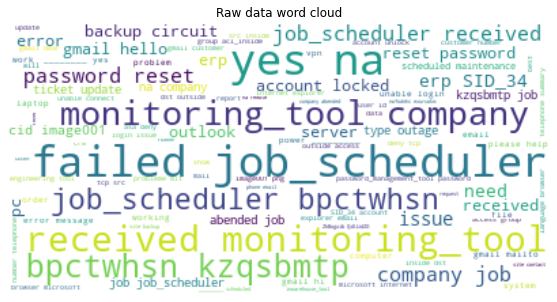

In [43]:
#Showcase Word Cloud befor data cleaning and after cleaning
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

## Now use the original data set without any cleaning.
# drop rows with missing values.. from the original dataset
df_copy.dropna(inplace=True) ## We need to remove nan to wordcloud... else you will get the errors

#Combine Text Fields
df_copy['Final Description'] = df_copy['Short description'].str.cat(df_copy['Description'],sep=" ")
df_copy['Final Description'] = df_copy['Final Description'].str.cat(df_copy['Caller'],sep=" ")
text = " ".join(review for review in df_copy['Final Description'])
print ("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(' '.join(df_copy['Final Description']))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Raw data word cloud")
plt.show()

There are 1306823 words in the combination of all review.


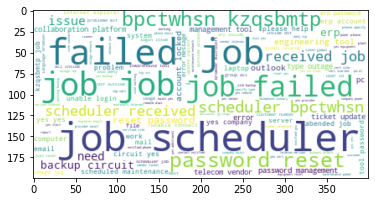

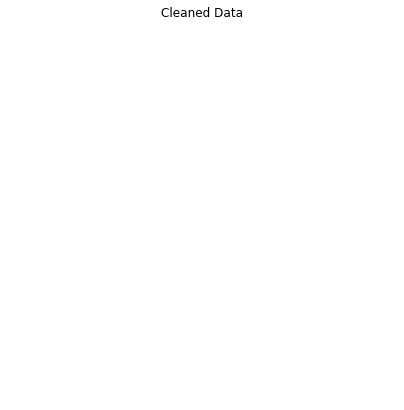

In [44]:
text = " ".join(review for review in df_clean['Description Clean'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=[7,7])
plt.axis("off")
plt.title("Cleaned Data")
plt.show()

There is reducation in word count before and after data cleaning..

In [45]:
#POS Tagging
def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text
nltk.download('averaged_perceptron_tagger')
df_clean['Description POS'] = df_clean['Description Clean Tokens'].apply(lambda x: word_pos_tagger(x))
df_clean.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Assignment group,Description Clean,Description Clean Tokens,Description Clean Tokens Stemmed,Description Clean Tokens Stemmed Lemmatized,Description POS
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m...","[login, issu, verifi, user, detail, employe, m...","[(login, JJ), (issue, NN), (verified, VBD), (u..."
1,GRP_0,outlook received team meetings skype meetings ...,"[outlook, received, team, meetings, skype, mee...","[outlook, receiv, team, meet, skype, meet, etc...","[outlook, receiv, team, meet, skype, meet, etc...","[(outlook, NN), (received, VBD), (team, JJ), (..."
2,GRP_0,log vpn received cannot log vpn best eylqgodm ...,"[log, vpn, received, can, not, log, vpn, best,...","[log, vpn, receiv, can, not, log, vpn, best, e...","[log, vpn, receiv, can, not, log, vpn, best, e...","[(log, NN), (vpn, NNS), (received, VBD), (can,..."
3,GRP_0,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces...","[unabl, access, hr, tool, page, unabl, access,...","[unabl, access, hr, tool, page, unabl, access,...","[(unable, JJ), (access, NN), (hr, NN), (tool, ..."
4,GRP_0,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error, owlgqjme, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]","[(skype, JJ), (error, NN), (skype, NN), (error..."


**LSTM Model#1**



In [48]:
## Import the libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [49]:
## Tokenize the description field and build the X and Y parameters for the model

for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
vocabSize = 10000
maxXFeatureSize = 200
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(df_clean['Description Clean'].values)

In [50]:
##Extract X
X = tokenizer.texts_to_sequences(df_clean['Description Clean'].values)
X = pad_sequences(X, maxlen = maxXFeatureSize ) ### Add max len parameter

In [51]:
X.shape

(7606, 200)

In [52]:
##Extract Y
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_clean['Assignment group'])
y_enc = le.transform(df_clean['Assignment group'])
Y = pd.get_dummies(y_enc).values

In [53]:
Y.shape

(7606, 24)

In [54]:
## Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5324, 200) (5324, 24)
(2282, 200) (2282, 24)


In [55]:
## Lets try out LSTM model
from keras.layers import Dropout

embed_dim = 128
lstm_out = 256    ### 256... 128

model = Sequential()
model.add(Embedding(vocabSize+1, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.3)) ### 0.2, 0.3
model.add(Dense(groupCount,activation='softmax'))  ### Note that they are 24 groups to which tickets are to be assigned 
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          1280128   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                6168      
Total params: 1,680,536
Trainable params: 1,680,536
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
# Using Keras Callbacks, save the best model based on validation data loss parameter
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto'),         
    ModelCheckpoint('./ticketCategorizationC2-{epoch:03d}.h5', monitor='val_loss', verbose=1, save_best_only = True)
]

In [57]:

batch_size = 32
EPOCHS = 50
history = model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs = EPOCHS, batch_size=batch_size, callbacks = callbacks,verbose = 2)  ### Add validation split..

Train on 5324 samples, validate on 2282 samples
Epoch 1/50
 - 151s - loss: 1.9275 - accuracy: 0.5554 - val_loss: 1.5737 - val_accuracy: 0.6025

Epoch 00001: val_loss improved from inf to 1.57373, saving model to ./ticketCategorizationC2-001.h5
Epoch 2/50
 - 151s - loss: 1.4693 - accuracy: 0.6136 - val_loss: 1.4077 - val_accuracy: 0.6284

Epoch 00002: val_loss improved from 1.57373 to 1.40770, saving model to ./ticketCategorizationC2-002.h5
Epoch 3/50
 - 152s - loss: 1.2717 - accuracy: 0.6456 - val_loss: 1.3795 - val_accuracy: 0.6437

Epoch 00003: val_loss improved from 1.40770 to 1.37949, saving model to ./ticketCategorizationC2-003.h5
Epoch 4/50
 - 152s - loss: 1.1129 - accuracy: 0.6751 - val_loss: 1.3054 - val_accuracy: 0.6569

Epoch 00004: val_loss improved from 1.37949 to 1.30536, saving model to ./ticketCategorizationC2-004.h5
Epoch 5/50
 - 153s - loss: 0.9847 - accuracy: 0.7079 - val_loss: 1.2941 - val_accuracy: 0.6389

Epoch 00005: val_loss improved from 1.30536 to 1.29410, savi

In [67]:
# It can be used to reconstruct the model identically.
from keras.models import load_model

reconstructed_model = load_model("./ticketCategorizationC2-007.h5")


In [68]:
print('\nModel Performance: Log Loss and Accuracy on Test data')
testLoss, testAcc = reconstructed_model.evaluate(X_test, Y_test, batch_size = 1)
print('\nTesting Scores:: loss: {}, acc: {}\n'.format(testLoss, testAcc))


Model Performance: Log Loss and Accuracy on Test data
2282/2282 [==============================] - 58s 26ms/step

Testing Scores:: loss: 1.287687792237469, acc: 0.6643295288085938



In [69]:
## Confusion matrix and Classification report

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
y_pred = reconstructed_model.predict_classes(X_test)
report = classification_report(rounded_labels, y_pred, target_names=df_clean['Assignment group'].unique() )
print(report)

              precision    recall  f1-score   support

       GRP_0       0.81      0.90      0.85      1178
       GRP_3       0.65      0.39      0.49        44
       GRP_4       0.70      0.61      0.65        79
       GRP_5       0.27      0.44      0.33        41
       GRP_6       0.24      0.22      0.23        23
       GRP_7       0.00      0.00      0.00        25
       GRP_8       0.89      0.64      0.74        25
       GRP_9       0.15      0.21      0.17        19
      GRP_10       0.12      0.21      0.15        66
      GRP_12       0.55      0.45      0.50        69
      GRP_13       0.93      0.76      0.84        92
      GRP_14       0.00      0.00      0.00        24
      GRP_16       0.00      0.00      0.00        19
      GRP_17       0.67      0.06      0.11        32
      GRP_18       0.35      0.38      0.36        58
      GRP_19       1.00      0.06      0.11        18
       GRP_2       0.26      0.36      0.30        25
      GRP_24       0.00    

In [72]:
cm = confusion_matrix(rounded_labels, y_pred)
cm

array([[1059,    3,    2,    5,    3,    2,    1,    1,   54,   13,    0,
           4,    0,    0,   17,    0,    6,    0,    0,    0,    0,    2,
           0,    6],
       [   5,   17,    0,    7,    0,    0,    0,    1,    3,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           8,    2],
       [  11,    0,   48,    1,    2,    0,    0,    1,    1,    4,    2,
           2,    0,    0,    1,    0,    2,    0,    0,    0,    0,    0,
           4,    0],
       [  10,    1,    0,   18,    1,    0,    0,    3,    2,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    2,    0,
           0,    3],
       [  10,    0,    4,    0,    5,    0,    0,    0,    1,    0,    0,
           1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           2,    0],
       [  20,    0,    0,    0,    1,    0,    0,    0,    1,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    1,    0,    1,    0,
       

**Defining Train and Test Data for ML classifier models**

In [61]:
from sklearn.model_selection import train_test_split
X = df_clean['Description Clean']
y = df['Assignment group']


In [62]:
X.shape

(7606,)

In [63]:
y.shape

(7606,)

**Using TFIDF for Model**

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_vector = tfidf_vectorizer.transform(X_train)
X_vector_validation = tfidf_vectorizer.transform(X_validation)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)

AttributeError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV   
# defining parameter range 
param_grid = {'C': [ 0.01, 0.25, 0.5, 1, 10, 100, 1000] }  
lr = LogisticRegression()  
grid = GridSearchCV(lr, param_grid, refit = True ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

In [ ]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 



In [ ]:
#Getting Accuracy and Recall for Train Data
final_tfidf = LogisticRegression(C=1000)
final_tfidf.fit(X_vector_train, y_vector_train)
accuracy = accuracy_score(y_test, final_tfidf.predict(X_vector_test))
recall = recall_score(y_test, final_tfidf.predict(X_vector_test),average='weighted')
#print ('Accuracy: ',accuracy," Recall: ",recall)
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': accuracy, 'Recall': recall})
resultsDf = resultsDf[['Method', 'Accuracy', 'Recall']]
resultsDf

In [ ]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

**Using SVM For the Model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_vector = ngram_vectorizer.transform(X_train)
X_vector_validation = ngram_vectorizer.transform(X_validation)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)

In [ ]:
# defining parameter range 
param_grid = {'C': [ 0.01, 0.05, 0.25, 1, 10, 100] }  
svm = LinearSVC()  
grid = GridSearchCV(svm, param_grid, refit = True ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

In [ ]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:
final_svm_ngram = LinearSVC(C=0.25)
final_svm_ngram.fit(X_vector, y_train)

accuracy = accuracy_score(y_test, final_svm_ngram.predict(X_vector_test))
recall = recall_score(y_test, final_svm_ngram.predict(X_vector_test),average='weighted')


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

In [ ]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

**n-Grams Model**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_vector = ngram_vectorizer.transform(X_train)
X_vector_validation = ngram_vectorizer.transform(X_validation)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)


In [ ]:
# defining parameter range 
param_grid = {'C': [ 0.01, 0.5, 1, 10] }  
lr = LogisticRegression()  
grid = GridSearchCV(lr, param_grid ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

In [ ]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:
final_ngram = LogisticRegression(C=10)
final_ngram.fit(X_vector, y_train)

accuracy = accuracy_score(y_test, final_ngram.predict(X_vector_test))
recall = recall_score(y_test, final_ngram.predict(X_vector_test),average='weighted')

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['N-Gram'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

In [ ]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

**Random Forest Classifier**

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# defining parameter range 
param_grid = {'n_estimators': [ 10, 50, 100] }  
rfcl = RandomForestClassifier() 
grid = GridSearchCV(rfcl, param_grid, refit = True ) 
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

In [ ]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_vector, y_train)
pred_RF = rfcl.predict(X_vector_test)
accuracy = accuracy_score(y_test, pred_RF)
recall = recall_score(y_test, pred_RF, average="weighted")

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

**LSTM **

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_features = 10000


In [ ]:
maxlen = 0
for row in df_clean['Description Stem']:
  row_length = len(row)
  if maxlen < row_length:
    maxlen = row_length

print (maxlen)

In [ ]:

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_clean['Description Stem'].values)

In [ ]:
X = tokenizer.texts_to_sequences(df_clean['Description Stem'].values)
X = pad_sequences(X, maxlen = maxlen)

## Perform lable encoder... and convert to catagorical.. 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_clean['Assignment group'])
y_enc = le.transform(df_clean['Assignment group'])

print("Number of Samples:", len(X))
#print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

In [ ]:
y_enc

In [ ]:
Y = pd.get_dummies(y_enc).values
Y

In [ ]:
Y[0].shape

In [ ]:
Y = pd.get_dummies(y_enc).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
len(tokenizer.word_index)

In [ ]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed
from tensorflow.keras.models import Model, Sequential


In [ ]:
num_words=len(tokenizer.word_index) + 1
embedding_size = 200

In [ ]:
model = Sequential()
model.add(Embedding(num_words,embedding_size,input_length=maxlen )) #10000 for vocab size, 8 for dimensionality of embedding
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 64)))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dense(50, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

In [ ]:
import time
batch_size = 50
epochs = 10
print('Train...')
start = time.clock()
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=[X_test, Y_test], validation_split=0.2, verbose=1)
end = time.clock()
print('Time spent:', end-start)

In [ ]:
print('\nModel Performance: Log Loss and Accuracy on Test data')
testLoss, testAcc = model.evaluate(X_test, Y_test, batch_size = 1)
print('\nTesting Scores:: loss: {}, acc: {}\n'.format(testLoss, testAcc))

In [ ]:


trainLoss, trainAcc = model.evaluate(X_train, Y_train, batch_size = 10)
print('\nTraining Scores::  loss: {}, acc: {}\n'.format(trainLoss, trainAcc))




In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
y_pred = model.predict_classes(X_test)
report = classification_report(rounded_labels, y_pred, target_names=df['Assignment group'].unique() )
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, y_pred)
cm